---
# Расходы покупателей

Имеются размеры сумм в долларах, потраченных 50 покупателями в супермаркете. Мы готовы рассматривать это как SRS (Simple Random Sample) всех покупателей на этом рынке.     

In [1]:
import numpy as np
import matplotlib.pyplot as plt

RANDOM_SEED = 41238
np.random.seed(RANDOM_SEED)

spendings = np.array([3.11, 8.88, 9.26, 10.81, 12.69, 13.78, 15.23, 15.62, 17.00, 17.39,
                    18.36, 18.43, 19.27, 19.50, 19.54, 20.16, 20.59, 22.22, 23.04, 24.47,
                    24.58, 25.13, 26.24, 26.26, 27.65, 28.06, 28.08, 28.38, 32.03, 34.98,
                    36.37, 38.64, 39.16, 41.02, 42.97, 44.08, 44.67, 45.40, 46.69, 48.65,
                    50.39, 52.75, 54.80, 59.07, 61.22, 70.32, 82.70, 85.76, 86.37, 93.34])

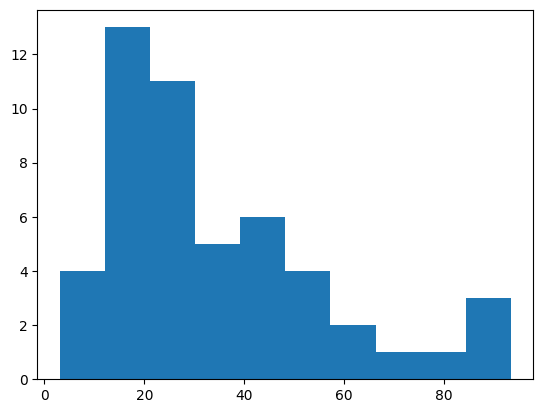

In [2]:
plt.hist(spendings)
plt.show()

In [3]:
samples_boot = np.random.choice(spendings, (len(spendings), 10000), replace=True)
samples_boot = samples_boot.mean(axis=0)

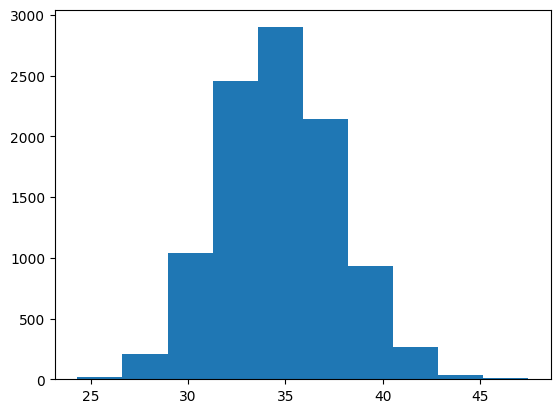

In [4]:
plt.hist(samples_boot)
plt.show()

---
## Доверительный интервал

Вспомним односторонний доверительный интервал для среднего значения нормально распределеной совокупности:

$$\bar{x} \pm t^* \frac{s}{\sqrt{n}}$$

Этот интервал основан на нормальном распределении выборки со средним значением выборки $x$ и формулой для стандартной ошибки выборки $x$. Когда бутстреп распределение приблизительно нормальное и имеет небольшое смещение, мы можем использовать ту же самую формулу со стандартной ошибкой бутстрепа, чтобы получить доверительный интервал для любого параметра. 

Предположим, что бутстреп распределение статистики из SRS размера $n$ приблизительно нормально и мало смещено. Тогда аппроксимация доверительного интервала на любую статистику вычисляется через бутстреп:

$$statistic \pm t^*SE_{boot,statistic}$$

где $t^*$ - критическое значение $t(n-1)$ распределения с площадью между $-t^*$ и $t^*$.

6. Найдите 95% доверительный интервал для среднего $\mu$ генеральной совокупности, основываясь на ваших "псевдовыборках" по формуле выше.

7. Второй вариант: оставьте 95% ваших наблюдений. Для этого от полученного бутстреп-распределения отсеките хвосты с помощью `np.percentile`, сравните эти результаты с доверительным интервалом, полученным в шестом пункте задания.

In [5]:
from scipy.stats import t

alpha = 5e-2
SE_boot = np.std(samples_boot, ddof=1)
S_mean = samples_boot.mean()
t_star = -t(len(samples_boot) - 1).ppf(alpha / 2)
left = S_mean - t_star * SE_boot
right = S_mean + t_star * SE_boot

st = np.std(spendings, ddof=1)
lx = spendings.mean() - t_star * st / np.sqrt(len(spendings))
rx = spendings.mean() + t_star * st / np.sqrt(len(spendings))
print(f"X: [{lx}; {rx}]")
print(f"SRS: [{left}; {right}]")

X: [28.687370419159013; 40.717029580840986]
SRS: [28.74635864155653; 40.613569398443474]


In [6]:
lp = np.percentile(samples_boot, q=alpha / 2 * 100)
rp = np.percentile(samples_boot, q=(1 - alpha / 2) * 100)

print(f"95% obs: [{lp}; {rp}]")

95% obs: [29.042769999999997; 40.799029999999995]


---
# Терапия при анорексии

В исследовании оценивается эффективность поведенческой терапии для лечения анорексии. Для 50 пациентов известен вес до начала терапии и по её окончании. Была ли терапия эффективной?

In [7]:
import pandas as pd
import numpy as np

In [8]:
w = pd.read_table("weight.txt")

In [9]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

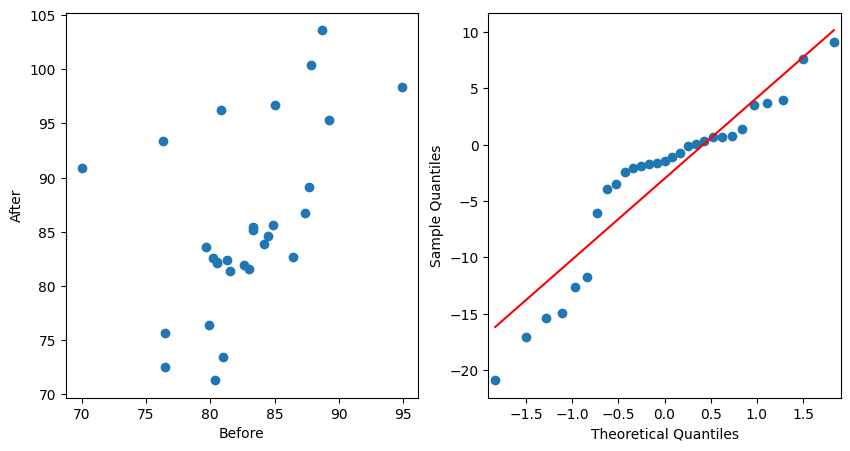

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.scatter(w['Before'], w['After'])
ax1.set(xlabel='Before', ylabel='After')
sm.qqplot(w['Before'] - w['After'], line ='s', ax=ax2)
plt.show()

1. Воспользуйтесь критериями знаков (`sign_test` из библиотеки `statsmodels`), критерием Уилкоксона (`wilcoxon` из библиотеки `scipy`). Не забудьте, что мы работаем со связанными выборками!

2. C помощью бутстрэпа из 5000 повторений постройте доверительный интервал на медиану разницы веса до и после лечения. (`bootstrap` из библиотеки `bootstrapped`)

In [11]:
from statsmodels.stats.descriptivestats import sign_test
from scipy.stats import wilcoxon

In [12]:
sign_test(w['Before'], w['After'])

(-3.5, 0.26493089646101)

In [13]:
wilcoxon(w['Before'], w['After'])

WilcoxonResult(statistic=131.5, pvalue=0.0622917003929615)

---
# Недвижимость в Сиэттле

Имеются данные о продажной стоимости недвижимости в Сиэтле для 50 сделок в 2001 году и 50 в 2002.
Изменились ли цены?

In [14]:
data = pd.read_table("seattle.txt")

In [15]:
x1 = data[data["Year"] == 2001]["Price"]

In [16]:
x2 = data[data["Year"] == 2002]["Price"]

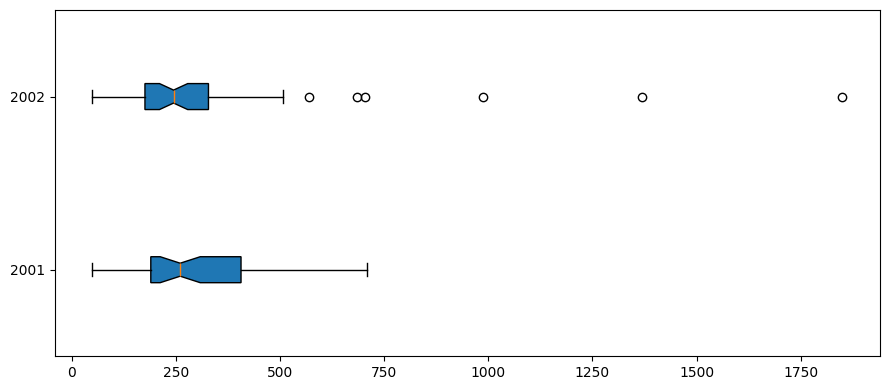

In [17]:
plt.figure(figsize=(9,4))
plt.boxplot([x1, x2], patch_artist=True, notch=True,
                vert=0, labels=['2001', '2002'])
plt.tight_layout()
plt.show()

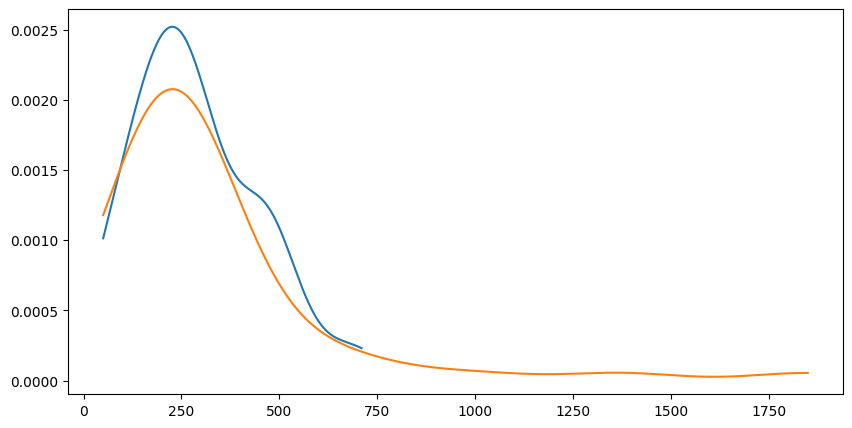

In [18]:
plt.figure(figsize=(10, 5))
from scipy.stats import gaussian_kde
density_x1 = gaussian_kde(x1)
density_x2 = gaussian_kde(x2)
x_1 = np.linspace(min(x1), max(x1), 300)
plt.plot(x_1, density_x1(x_1))
x_2 = np.linspace(min(x2), max(x2), 300)
plt.plot(x_2, density_x2(x_2))
plt.show()

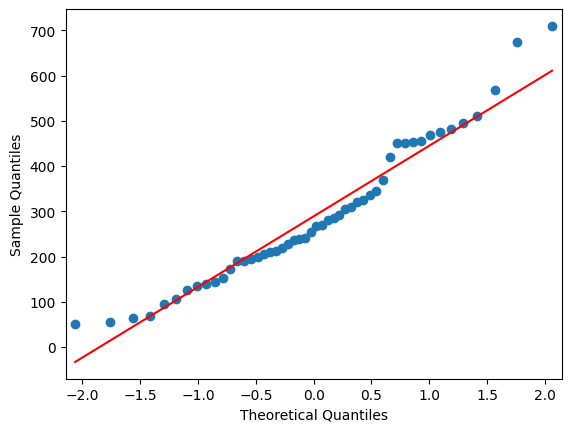

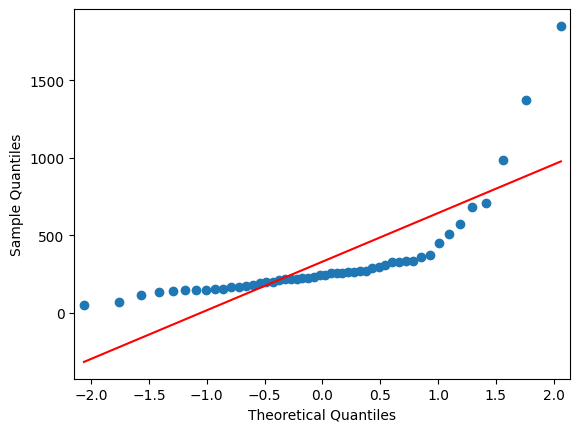

In [19]:
sm.qqplot(x1, line ='s')
sm.qqplot(x2, line ='s')
plt.show()

1. Воспользуйтесь критерием Стьюдента.

2. Постройте доверительные интервалы для средних значений в обеих выборках, а также доверительный интервал для разницы средних по обеим выборкам.